In [3]:
import tensorflow as tf
from tensorflow import keras 
import numpy as np 


2023-02-16 13:21:11.827831: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-16 13:21:11.975274: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/avi/Downloads/aws_kinesis/amazon-kinesis-video-streams-producer-sdk-cpp/open-source/local/lib
2023-02-16 13:21:11.975298: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-02-16 13:21:12.770254: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynami

In [18]:
mnist_dataset = tf.keras.datasets.fashion_mnist


In [21]:

(train_image,train_label),(test_image,test_label) = mnist_dataset.load_data()

In [25]:
train_imag1_nr = train_image/0.255
test_image_nr = test_image/0/255
train_image_nr = train_image_nr.reshape(-1,28, 28, 1)

# The reshape method is used to change the shape of this array to (n, 28, 28, 1). 
# This new shape indicates that the array now has four dimensions, with the first dimension 
# being the number of images in a dataset. The second and third dimensions represent the height 
# and width of each image, both of which are now fixed at 28 pixels. The fourth dimension,
#  with a size of 1, represents the number of channels in the image.



/home/avi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  
/home/avi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


In [26]:

mnist_dataset = tf.keras.datasets.fashion_mnist
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64,(3,3),activation='relu',input_shape=(28,28,1)),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax')
])

In [27]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 1600)              0         
                                                                 
 dense_6 (Dense)             (None, 128)              

In [28]:

model.compile(loss = "sparse_categorical_crossentropy", optimizer= tf.optimizers.Adam(),metrics = ['accuracy'])

In [29]:
model.fit(train_imag1_nr,train_label,epochs=10)

Epoch 1/10


2023-02-16 14:12:39.585540: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 188160000 exceeds 10% of free system memory.


1875/1875 [==============================] - 37s 19ms/step - loss: 1.2549 - accuracy: 0.7879
Epoch 2/10
1875/1875 [==============================] - 41s 22ms/step - loss: 0.4205 - accuracy: 0.8448
Epoch 3/10
1875/1875 [==============================] - 42s 22ms/step - loss: 0.3636 - accuracy: 0.8648
Epoch 4/10
1875/1875 [==============================] - 42s 23ms/step - loss: 0.3431 - accuracy: 0.8714
Epoch 5/10
1875/1875 [==============================] - 39s 21ms/step - loss: 0.3185 - accuracy: 0.8811
Epoch 6/10
1875/1875 [==============================] - 40s 21ms/step - loss: 0.2975 - accuracy: 0.8878
Epoch 7/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.2768 - accuracy: 0.8965
Epoch 8/10
1875/1875 [==============================] - 40s 21ms/step - loss: 0.2639 - accuracy: 0.9003
Epoch 9/10
1875/1875 [==============================] - 41s 22ms/step - loss: 0.2558 - accuracy: 0.9038
Epoch 10/10
1875/1875 [==============================] - 45s 24ms/step - lo

In [71]:
model.evaluate(test_image_nr,test_label)

313/313 [==============================] - 2s 5ms/step - loss: nan - accuracy: 0.1000


[nan, 0.10000000149011612]

Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


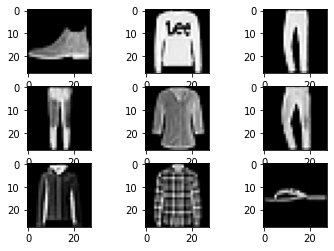

In [86]:
# example of loading the fashion mnist dataset
from matplotlib import pyplot
from keras.datasets import fashion_mnist
# load dataset
(trainX, trainy), (testX, testy) = fashion_mnist.load_data()
# summarize loaded dataset
print('Train: X=%s, y=%s' % (trainX.shape, trainy.shape))
print('Test: X=%s, y=%s' % (testX.shape, testy.shape))
# plot first few images
for i in range(9):
 # define subplot
 pyplot.subplot(330 + 1 + i)
 # plot raw pixel data
 pyplot.imshow(testX[i], cmap=pyplot.get_cmap('gray'))
# show the figure
pyplot.show()

1/1 [==============================] - 0s 25ms/step
[[8.7486818e-09 9.9999845e-01 2.7286491e-09 1.4407049e-06 4.5691678e-08
  7.8684821e-14 4.1411081e-08 1.7196203e-18 2.2867408e-08 4.6406271e-15]]


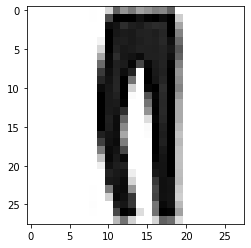

In [88]:
plt.imshow(test_image[2].reshape(28, 28),cmap='Greys')
pred=model.predict(test_image[2].reshape(1,28,28,1))
print(pred)

In [30]:
#visualization of image 

print(test_label[:100])

[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0 2 5 7 9 1 4 6 0 9 3 8 8 3 3 8 0 7
 5 7 9 6 1 3 7 6 7 2 1 2 2 4 4 5 8 2 2 8 4 8 0 7 7 8 5 1 1 2 3 9 8 7 0 2 6
 2 3 1 2 8 4 1 8 5 9 5 0 3 2 0 6 5 3 6 7 1 8 0 1 4 2]


In [50]:
from scipy import misc
acent_image = misc.ascent()

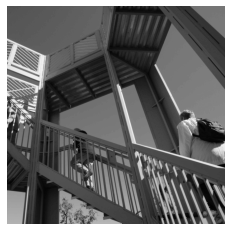

In [51]:
import matplotlib.pyplot as plt
plt.grid(False)
plt.gray()
plt.axis('off')
plt.imshow(acent_image)
plt.show()

In [60]:
image_transformed = np.copy(acent_image)
xe = image_transformed.shape[0]
ye = image_transformed.shape[1]


In [68]:

filters1 = [[0,1,0],[1,-4,1],[0,1,0]]
filterss = [[-1,0,1],[-2,0,2],[-1,0,1]]
weight = 1

In [69]:
for xx in range(1,xe-1):
    for yy in range(1,ye-1):
        convolution = 0.0 
        convolution = convolution +(acent_image[xx-1, yy-1]*filterss[0][0])
        convolution = convolution +(acent_image[xx-1, yy]*filterss[0][1])
        convolution = convolution +(acent_image[xx-1, yy+1]*filterss[0][2])
        convolution = convolution +(acent_image[xx, yy-1]*filterss[1][0])
        convolution = convolution +(acent_image[xx, yy ]*filterss[1][1])
        convolution = convolution +(acent_image[xx, yy+1]*filterss[1][2])
        convolution = convolution +(acent_image[xx+1, yy-1]*filterss[2][0])
        convolution = convolution +(acent_image[xx+1, yy]*filterss[2][1])
        convolution = convolution +(acent_image[xx+1, yy+1]*filterss[2][2])

        convolution = convolution * weight 

        if(convolution<0):
            convolution =0
        if(convolution>255):
            convolution =255
        
        image_transformed[xx,yy] = convolution

print(image_transformed)

[[ 83  83  83 ... 117 117 117]
 [ 82   5   4 ...   0   0 117]
 [ 80   8   6 ...   0   0 117]
 ...
 [178   0   0 ...  13   8  57]
 [178   0   0 ...  38   3  57]
 [178 178 178 ...  57  57  58]]


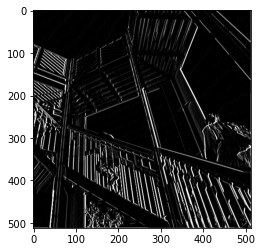

In [70]:
plt.gray()
plt.grid(False)
plt.imshow(image_transformed)
plt.show()